In [1]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()

### Задание

1) Скачайте текст войны и мир. Очистите его, оставив только русские буквы и символы пробела. Постройте матрицу переходных вероятностей.

2) Посчитайте вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р; 

3) Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы "Б" и имеющее длину 8-мь символов

4) Возьмите ряд и оцените его через HMM. Попробуйте "построить" (через среднее каждой компоненты) наивный прогноз ряда.

1) Скачайте текст войны и мир. Очистите его, оставив только русские буквы и символы пробела. Постройте матрицу переходных вероятностей.

In [16]:
# Война и мир
with open('War_and_Peace.txt', 'r', encoding='koi8-r') as f:
    text_ru = f.read().lower()
text_ru = re.sub('[^а-я]','', text_ru)

In [18]:
RUSSIAN = 'абвгдежзийклмнопрстуфхцчшщъыьэюя'
POS_RU = {l: i for i, l in enumerate(RUSSIAN)}

probabilities_ru = np.zeros((len(RUSSIAN), len(RUSSIAN)))

for cp, cn in zip(text_ru[:-1], text_ru[1:]):
    probabilities_ru[POS_RU[cp], POS_RU[cn]] += 1
  
# Матрица переходных вероятностей
probabilities_ru = (probabilities_ru / probabilities_ru.sum(axis=1)[:, None])

2) Посчитайте вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р;

In [30]:
proba_sum = 0
start = POS_RU['п']
end = POS_RU['р']
prior = 1. / len(RUSSIAN)
for c in RUSSIAN:
    for cc in RUSSIAN:
        proba = prior * probabilities_ru[start, POS_RU[c]]* probabilities_ru[POS_RU[c],POS_RU[cc]]* probabilities_ru[POS_RU[cc], end]
        proba_sum += proba
            
print(f'Суммарная вероятность для строки из 4-х символов с началом на "п" и окончанием на "р": {proba_sum:0.5}')

Суммарная вероятность для строки из 4-х символов с началом на "п" и окончанием на "р": 0.0015764


3) Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы "Б" и имеющее длину 8-мь символов

In [40]:
s = ['б']
length = 8

for i in range(length):
    index = POS_RU[s[i]]
    next_char = np.random.choice(list(RUSSIAN), p=probabilities_ru[index])
    s.append(next_char)
    
print (''.join(s))

бшияремюк


4) Возьмите ряд и оцените его через HMM. Попробуйте "построить" (через среднее каждой компоненты) наивный прогноз ряда.

In [48]:
from hmmlearn.hmm import GaussianHMM

In [68]:
df = pd.read_csv("numbers-on-unemployment-benefits.csv")
df.columns = ['Month','Unemployment Benefits']
df.dropna(inplace = True)

series = df['Unemployment Benefits']

In [69]:
values = series.values.reshape(-1,1)

In [70]:
for n in range(1, 14):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(values)
    print (n, model.score(values))

1 -6052.087693811389
2 -5328.153028537578
3 -5192.6870192893875
4 -5130.695412154105
5 -5070.072242563991
6 -4940.747278765072
7 -4914.212170859738
8 -4876.090742539255
9 -4850.61113580164
10 -4831.928092270658
11 -4778.548820159947
12 -4761.897744436635
13 -4757.257748884429


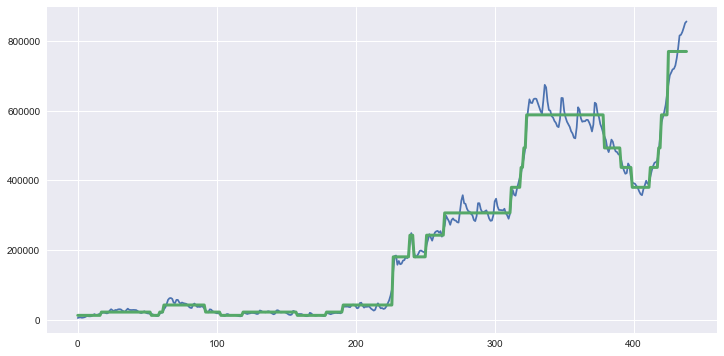

In [86]:
model = GaussianHMM(n_components=11,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]
    
plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3)

In [110]:
cur_value = labels[-1]
predictions = []
for _ in range(20):
    cur_value = np.random.choice(11, p=model.transmat_[cur_value])
    predictions.append(model.means_[cur_value])

In [111]:
new_series = np.concatenate((values, np.array(predictions)))

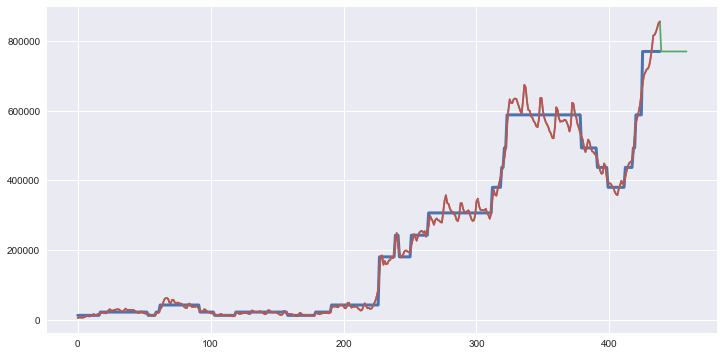

In [112]:
plt.figure(figsize=(12,6))
plt.plot(means, linewidth=3)
plt.plot(new_series)
plt.plot(values)
plt.show()